連結:https://colab.research.google.com/drive/1PRhOyTvjHqskeE6H6pX8BSPbqn7hFLjr?usp=sharing

In [1]:
pip install jieba

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install zhon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.8/99.8 KB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for zhon: filename=zhon-1.1.5-py3-none-any.whl size=84318 sha256=38c439ec16a622ff10cb58d1a8b5085083d98de8498cd56f688302a5b5173608
  Stored in directory: /root/.cache/pip/wheels/a3/4d/f7/33026ca375a2fbdbc04f9522ac48e3f3119e6f55d4a8f38fb6
Successfully built zhon


In [12]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import requests
import re
from zhon.hanzi import punctuation

url = "https://github.com/cjwu/cjwu.github.io/raw/master/courses/nlp/hw1-dataset.txt"
response = requests.get(url)
data = response.text

sen_text = re.compile(u'[\u4E00-\u9F45|\s\w]').findall(data)
sentence = "".join(sen_text)
sentence = sentence.replace(' ', '')
sentence = sentence.replace('\t', '')
list = sentence.split('\n')
# print(list[:2])
articles = []
for l in list:
  articles.append((l, len(l)))
# print(articles[:2])
total_articles = len(articles)
print("文章總數:", total_articles)

文章總數: 418203


In [4]:
import jieba

seg_list = []

for article in articles:  
  seg_list.append((jieba.lcut(article[0]), article[1]))

print(seg_list[:2])

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.303 seconds.
DEBUG:jieba:Loading model cost 1.303 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


[(['為', '什麼', '聖結', '石會', '被', '酸', '而', '這群', '人', '不會質', '感劇本', '成員', '都', '差', '很多', '好', '嗎', '不要', '拿', '腎', '結石來', '污辱', '這群', '人'], 39), (['為', '什麼', '慶祝', '228', '會', '被', '罵', '可是', '慶', '端午', '不會', '因為', '屈原', '不是', '台灣', '人', '是', '楚國人'], 31)]


In [5]:
import math
from collections import Counter

## 計算tf & 依照tf排列
N = 0
rtps = []
for article in seg_list:
    counter = Counter(article[0])
    for item in counter.items():
        rtps.append((N , item[0], item[1] / article[1]))
        N += 1

rtps = sorted(rtps, key=lambda item:item[2], reverse=True)
print(rtps[:5])
    

[(2843346, '咩', 1.0), (5149869, '人', 1.0), (5919836, '人', 1.0), (1814372, '啦', 0.9), (2865431, '噢', 0.8636363636363636)]


In [6]:
## 計算idf
idf = {}

for article in seg_list:
    counter = Counter(article[0])
    for item in counter.items():
        exist_idf = idf.get(item[0]) 
        if exist_idf:
            idf.update({item[0]: exist_idf + item[1]})
        else:
            idf[item[0]] = item[1]

for iDF in idf.items():
    idf[iDF[0]] = math.log(total_articles/iDF[1], 10)

## 依照idf權重排列
list_idf = sorted(idf.items(), key=lambda item:item[1], reverse=True)
list_idf = list_idf

dict_idf = {}
for lt in list_idf:
    dict_idf[lt[0]] = lt[1]

In [7]:
## 計算tf-idfs
rtf_idfs = []
for item in rtps:
    rtf_idfs.append((item[0], item[1], item[2] * idf[item[1]]))

rtf_idfs = sorted(rtf_idfs, key=lambda item:item[2], reverse=True)
print(rtf_idfs[:5])

[(1468077, '鞥', 3.3651310367640437), (2865431, '噢', 3.0349711959673664), (671431, '龘', 2.9055791757218588), (1100187, '〩', 2.8681869443416623), (2843346, '咩', 2.845412812796503)]


In [8]:
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

--2023-03-18 16:24:31--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 172.253.63.102, 172.253.63.100, 172.253.63.113, ...
Connecting to drive.google.com (drive.google.com)|172.253.63.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/sicjsrtvoccqvhvk0tb6jvgjcbhl3i55/1679156625000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=c0ce09b6-e5ce-49a1-8c1e-4722cfa44430 [following]
--2023-03-18 16:24:35--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/sicjsrtvoccqvhvk0tb6jvgjcbhl3i55/1679156625000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=c0ce09b6-e5ce-49a1-8c1e-4722cfa44430
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 142.251.111.132, 2607:f8b0:4004:c19::84
Connecting to doc-0

In [9]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.font_manager import FontProperties

matplotlib.font_manager.fontManager.addfont('taipei_sans_tc_beta.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

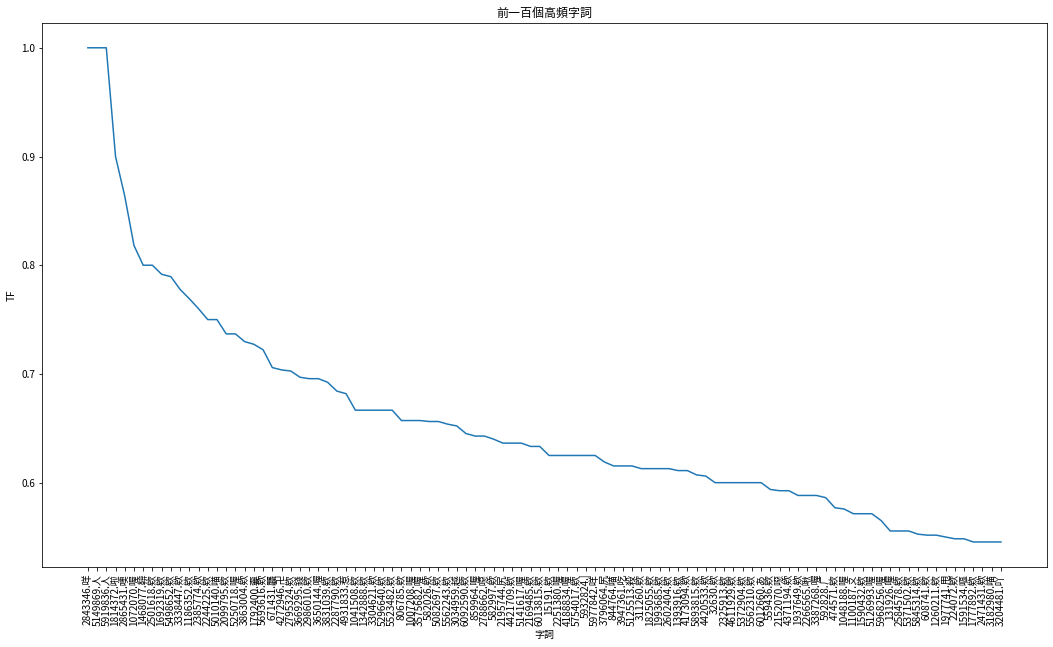

In [26]:
#前一百個高頻字詞
x_axis = []
y_axis = []

for item in rtps[:100]:
    x_axis.append(str(item[0]) + '.' + item[1])
    y_axis.append(item[2])

plt.figure(figsize = (18 , 10))
plt.plot(x_axis, y_axis)
plt.title("前一百個高頻字詞")
plt.ylabel("TF",)
plt.xlabel("字詞")
plt.xticks(rotation = 90)
plt.show()

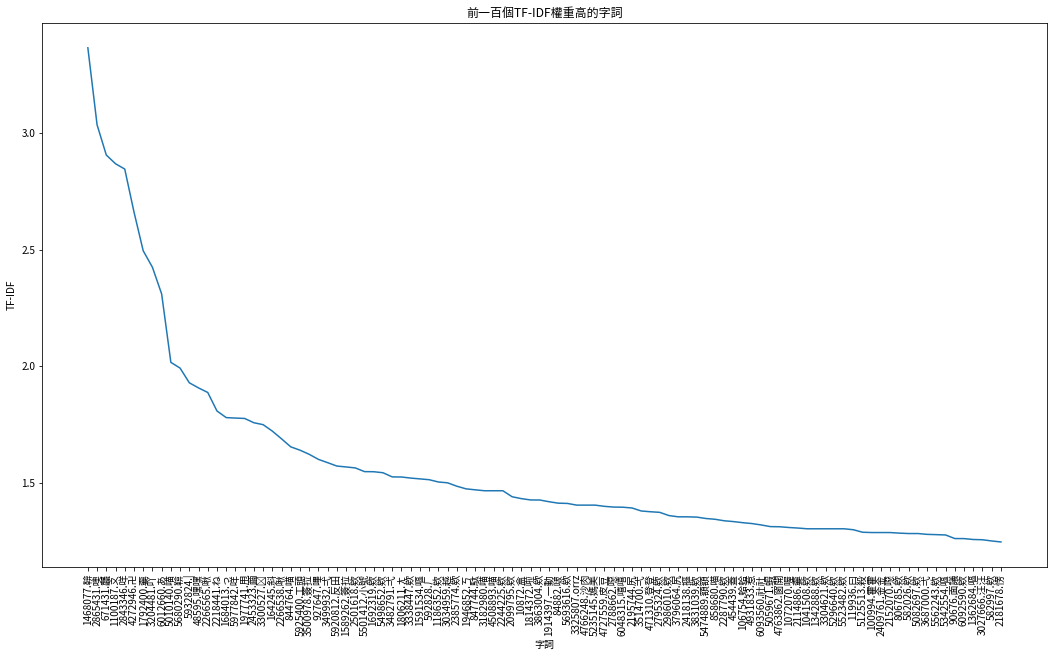

In [25]:
#前一百個TF-IDF權重高的字詞
x_axis = []
y_axis = []

for item in rtf_idfs[:100]:
    x_axis.append(str(item[0]) + '.' + item[1])
    y_axis.append(item[2])

plt.figure(figsize = (18 , 10))
plt.plot(x_axis, y_axis)
plt.title("前一百個TF-IDF權重高的字詞")
plt.ylabel("TF-IDF",)
plt.xlabel("字詞")
plt.xticks(rotation = 90)
plt.show()    

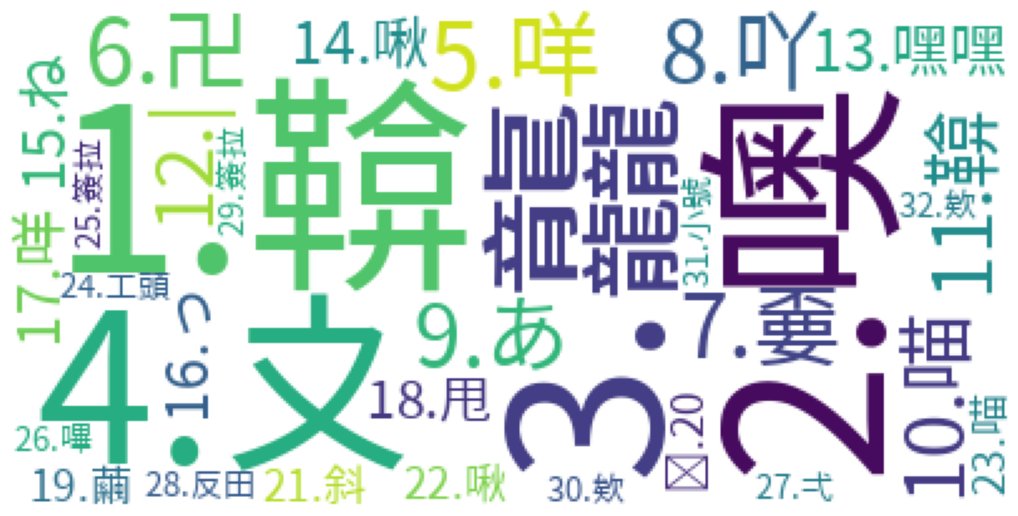

In [27]:
#製作取前32個文字雲
from wordcloud import WordCloud

num = 1
cloud = {}
for l in rtf_idfs[:32]:
    cloud[str(num) + '.' + l[1]] = l[2]
    num += 1

my_wordcloud = WordCloud(background_color="white", contour_width=3, contour_color='blue', font_path= 'taipei_sans_tc_beta.ttf').generate_from_frequencies(cloud)
plt.figure(figsize = (18, 10))
plt.imshow(my_wordcloud)
plt.axis("off")
plt.show()